In [ ]:
!pip install dlib
!pip install opencv-python


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2  # Giải nén tệp


--2024-11-19 17:32:29--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  43.8MB/s    in 1.4s    

2024-11-19 17:32:31 (43.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


Saving face_3.jpg to face_3 (40).jpg


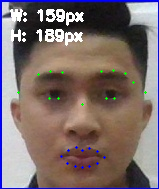

In [ ]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

# Đường dẫn đến mô hình dlib
predictor_path = "shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor(predictor_path)

# Tải lên ảnh
from google.colab import files
uploaded = files.upload()

# Đọc ảnh đã tải lên
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Phát hiện khuôn mặt
faces = face_detector(gray)
for face in faces:
    # Dự đoán các đặc điểm trên khuôn mặt
    landmarks = shape_predictor(gray, face)

    # Lấy các điểm đặc trưng cho hai mắt và toàn bộ miệng
    # left_eye_points = [18,19,20,21,22,28,40,41,42]
    right_eye_points = [0,18,19,20,28,23,24,25,26,16,41,42,47,48,49]
    mouth_points = [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

    # # Vẽ các điểm đặc trưng cho mắt trái
    # for idx in left_eye_points:
    #     x, y = landmarks.part(idx).x, landmarks.part(idx).y
    #     cv2.circle(image, (x, y), 3, (0, 0, 255), -1)  # Màu đỏ cho mắt trái

    # Vẽ các điểm đặc trưng cho mắt phải
    for idx in right_eye_points:
        x, y = landmarks.part(idx).x, landmarks.part(idx).y
        cv2.circle(image, (x, y), 1, (0, 255, 0), -1)  # Màu xanh lá cho mắt phải

    # Vẽ các điểm đặc trưng cho miệng
    for idx in mouth_points:
        x, y = landmarks.part(idx).x, landmarks.part(idx).y
        cv2.circle(image, (x, y), 1, (255, 0, 0), -1)  # Màu xanh cho miệng

# Hiển thị kết quả
cv2_imshow(image)


Saving face_3.jpg to face_3 (2).jpg


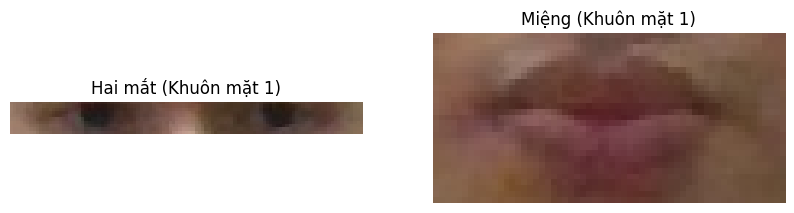

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Tải file từ máy tính
uploaded = files.upload()

# Lấy tên file vừa tải lên
image_path = list(uploaded.keys())[0]

# Đường dẫn đến mô hình landmarks
landmark_model_path = "shape_predictor_68_face_landmarks.dat"

# Khởi tạo detector và predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(landmark_model_path)

def crop_image(img, landmarks, points_range, margin=0.2):
    """
    Cắt ảnh từ vùng landmark với biên độ mở rộng.

    Parameters:
        img (numpy array): Ảnh gốc.
        landmarks (numpy array): Tọa độ landmarks.
        points_range (slice): Phạm vi điểm landmark cần cắt.
        margin (float): Tỷ lệ mở rộng biên độ (mặc định là 0.2, tức 20%).

    Returns:
        numpy array: Ảnh được cắt.
    """
    # Tìm bounding box của các điểm cần cắt
    points = landmarks[points_range, :]
    x, y, w, h = cv2.boundingRect(points)

    # Tính toán mở rộng thêm margin
    margin_w = int(w * margin)
    margin_h = int(h * margin)

    # Điều chỉnh tọa độ và kích thước vùng cắt
    x_start = max(0, x - margin_w)
    y_start = max(0, y - margin_h)
    x_end = min(img.shape[1], x + w + margin_w)
    y_end = min(img.shape[0], y + h + margin_h)

    cropped = img[y_start:y_end, x_start:x_end]
    return cropped

# Đọc ảnh
img = cv2.imread(image_path)

# Phát hiện khuôn mặt
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

if len(faces) == 0:
    print("Không phát hiện khuôn mặt trong ảnh.")
else:
    # Xử lý từng khuôn mặt
    for i, face in enumerate(faces, 1):
        # Dự đoán landmarks
        landmarks = predictor(gray, face)
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Cắt vùng hai mắt (landmarks 36-47)
        eyes_image = crop_image(img, landmarks_np, slice(36, 48), margin=0.2)

        # Cắt vùng miệng (landmarks 48-67)
        mouth_image = crop_image(img, landmarks_np, slice(48, 68), margin=0.2)

        # Hiển thị ảnh đã cắt
        plt.figure(figsize=(10, 5))

        # Hiển thị ảnh hai mắt
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(eyes_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Hai mắt (Khuôn mặt {i})")
        plt.axis("off")

        # Hiển thị ảnh miệng
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(mouth_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Miệng (Khuôn mặt {i})")
        plt.axis("off")

        # Hiển thị tất cả
        plt.show()


Saving img0096-1592366363868430058761-1593507888983990295582.jpg to img0096-1592366363868430058761-1593507888983990295582 (1).jpg


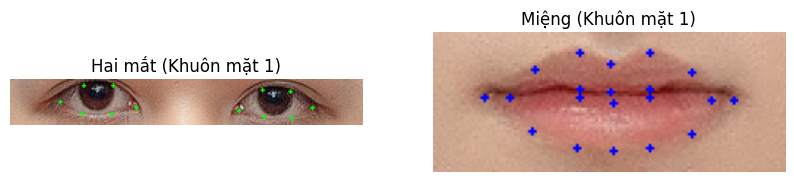

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Tải file từ máy tính
uploaded = files.upload()

# Lấy tên file vừa tải lên
image_path = list(uploaded.keys())[0]

# Đường dẫn đến mô hình landmarks
landmark_model_path = "shape_predictor_68_face_landmarks.dat"

# Khởi tạo detector và predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(landmark_model_path)

def crop_and_draw_landmarks(img, landmarks, points_range, margin=0.2, color=(255, 0, 0), radius=1):
    """
    Cắt ảnh và vẽ landmarks trực tiếp trên ảnh đã cắt.

    Parameters:
        img (numpy array): Ảnh gốc.
        landmarks (numpy array): Tọa độ landmarks.
        points_range (slice): Phạm vi điểm cần vẽ.
        margin (float): Tỷ lệ mở rộng biên độ (mặc định là 0.2).
        color (tuple): Màu của các chấm (mặc định là đỏ).
        radius (int): Bán kính của các chấm (mặc định là 1).

    Returns:
        numpy array: Ảnh đã cắt và có vẽ các chấm.
    """
    # Tìm bounding box của các điểm cần cắt
    points = landmarks[points_range, :]
    x, y, w, h = cv2.boundingRect(points)

    # Tính toán mở rộng thêm margin
    margin_w = int(w * margin)
    margin_h = int(h * margin)
    x_start = max(0, x - margin_w)
    y_start = max(0, y - margin_h)
    x_end = min(img.shape[1], x + w + margin_w)
    y_end = min(img.shape[0], y + h + margin_h)

    # Cắt ảnh
    cropped = img[y_start:y_end, x_start:x_end].copy()

    # Vẽ các điểm landmark lên ảnh đã cắt
    for point in points:
        # Vẽ các chấm cực nhỏ với radius=1
        cv2.circle(cropped, (point[0] - x_start, point[1] - y_start), radius=1, color=color, thickness=-1)

    return cropped

# Đọc ảnh
img = cv2.imread(image_path)

# Phát hiện khuôn mặt
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

if len(faces) == 0:
    print("Không phát hiện khuôn mặt trong ảnh.")
else:
    for i, face in enumerate(faces, 1):
        # Dự đoán landmarks
        landmarks = predictor(gray, face)
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Cắt và vẽ landmarks cho hai mắt
        eyes_image = crop_and_draw_landmarks(img, landmarks_np, slice(36, 48), margin=0.2, color=(0, 255, 0), radius=1)

        # Cắt và vẽ landmarks cho miệng
        mouth_image = crop_and_draw_landmarks(img, landmarks_np, slice(48, 68), margin=0.2, color=(255, 0, 0), radius=1)

        # Hiển thị kết quả
        plt.figure(figsize=(10, 5))

        # Ảnh hai mắt
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(eyes_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Hai mắt (Khuôn mặt {i})")
        plt.axis("off")

        # Ảnh miệng
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(mouth_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Miệng (Khuôn mặt {i})")
        plt.axis("off")

        plt.show()
